In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("College.csv")

In [7]:
df.head(10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [9]:
df.shape

(777, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [105]:
print(df.columns)
df.isnull().sum()

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate', 'Cluster'],
      dtype='object')


Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
Cluster        0
dtype: int64

In [49]:
#X= df.iloc[:, [3,18]].values

# Select numerical features for clustering
features = ["Accept", "Grad.Rate", "Expend", "S.F.Ratio"]
X = df[features].dropna()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Determine optimal clusters using the Elbow Method

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

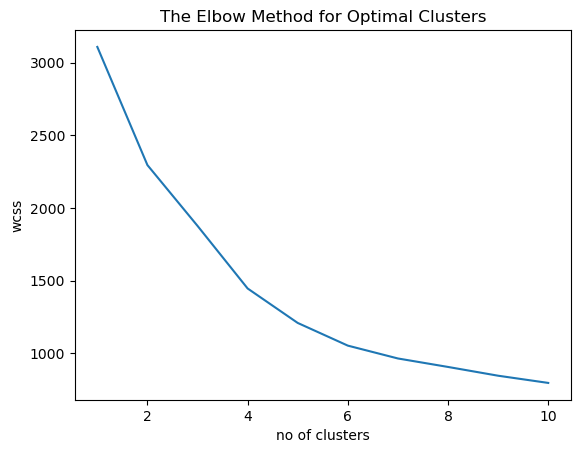

In [53]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method for Optimal Clusters')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [89]:
# Apply K-Means with optimal K (e.g., k=3 based on Elbow Method)
optimal_k = 5

kmeansmodel = KMeans(n_clusters= optimal_k, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X_scaled)
df['Cluster'] = y_kmeans

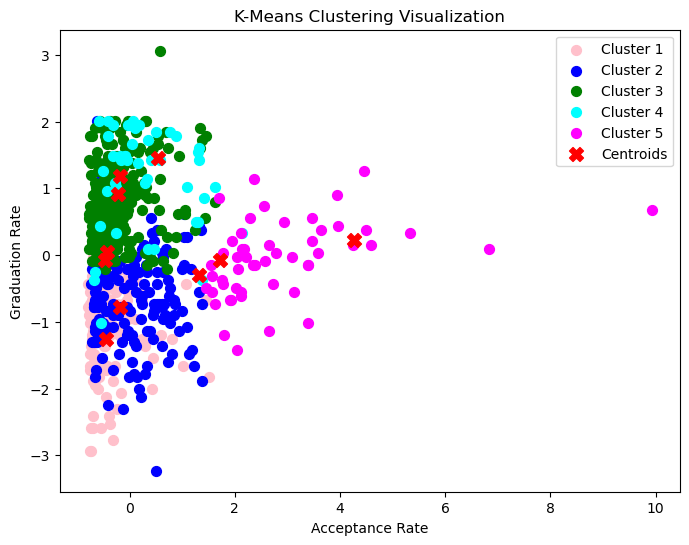

"\n# Visualizing the clusters (using first two principal features for 2D plotting)\nplt.figure(figsize=(8, 6))\nsns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis', s=50)\nplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')\n\nplt.xlabel(features[0])\nplt.ylabel(features[1])\nplt.title('K-Means Clustering Visualization')\nplt.legend()\nplt.show()\n"

In [117]:
#Visualizing all the clusters 
# Visualizing the clusters (using first two principal features for 2D plotting)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1],s = 50, c = 'pink', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, marker='X',c = 'red', label = 'Centroids')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Acceptance Rate')
plt.ylabel('Graduation Rate')
plt.legend()
plt.show()

"""
# Visualizing the clusters (using first two principal features for 2D plotting)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()
"""

In [93]:
#Summary statics of Cluster
# Analyzing the characteristics of each clusters


cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

              Accept  Grad.Rate        Expend  S.F.Ratio
Cluster                                                 
0         887.057692  50.600962   8449.158654  12.776442
1        2132.216867  54.692771   6128.608434  19.094578
2        1423.504918  78.583607  10048.016393  12.815082
3        2695.565217  85.478261  24947.347826   7.804348
4        9076.730769  64.634615   9979.923077  16.401923


In [95]:
#Size distribution

# Count the number of colleges in each cluster

print(df['Cluster'].value_counts())


Cluster
2    305
0    208
1    166
4     52
3     46
Name: count, dtype: int64


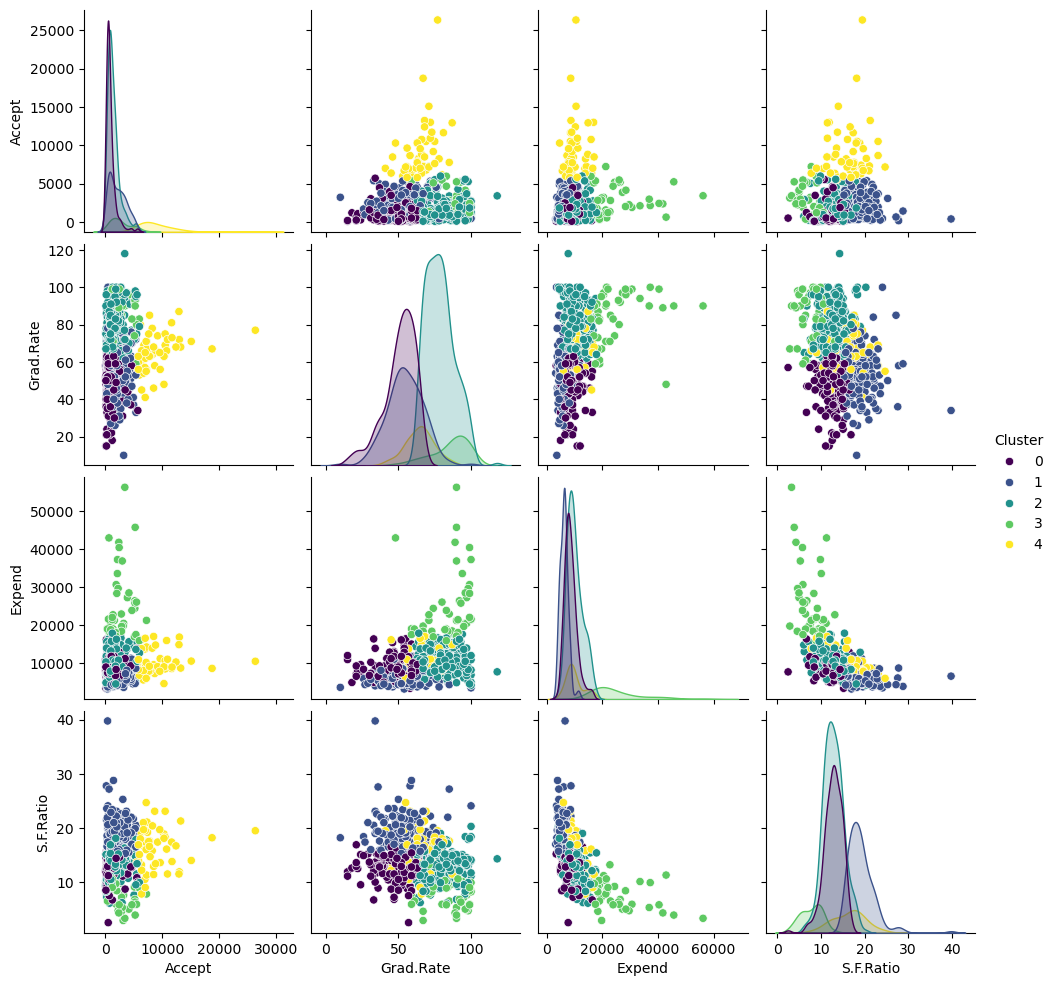

In [97]:
# Visualizing Cluster Differences
# Pairplot to observe cluster separation
import seaborn as sns
sns.pairplot(df, hue='Cluster', vars=features, palette='viridis')
plt.show()


In [107]:
# Identifying Representative Colleges
# Display sample colleges from each cluster
for cluster in df['Cluster'].unique():
    print(f"\nSample colleges from Cluster {cluster}:")
    print(df[df['Cluster'] == cluster][['Unnamed: 0'] + features].head(3))



Sample colleges from Cluster 1:
                      Unnamed: 0  Accept  Grad.Rate  Expend  S.F.Ratio
0   Abilene Christian University    1232         60    7041       18.1
19       Angelo State University    2001         34    4010       23.1
21  Appalachian State University    4664         70    5854       18.3

Sample colleges from Cluster 0:
                  Unnamed: 0  Accept  Grad.Rate  Expend  S.F.Ratio
1         Adelphi University    1924         56   10527       12.2
2             Adrian College    1097         54    8735       12.9
4  Alaska Pacific University     146         15   10922       11.9

Sample colleges from Cluster 3:
             Unnamed: 0  Accept  Grad.Rate  Expend  S.F.Ratio
3   Agnes Scott College     349         59   19016        7.7
16      Amherst College     992        100   21424        8.4
20   Antioch University     661         48   42926       11.3

Sample colleges from Cluster 2:
           Unnamed: 0  Accept  Grad.Rate  Expend  S.F.Ratio
7      A